In [164]:
%load_ext autoreload
%autoreload

import csv
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Galton data sets locations
BLOODPRESS_DATA_LOC='../datasets/bloodpress/bloodpress.txt'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Get the data
data =[]
with open (BLOODPRESS_DATA_LOC, 'r') as f:
    data.append([row for row in csv.reader(f,delimiter='\t')])
bloodpress_df = pd.DataFrame(data[0][1:], columns=data[0][0])
bloodpress_df.head()

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,1,105,47,85.4,1.75,5.1,63,33
1,2,115,49,94.2,2.10,3.8,70,14
2,3,116,49,95.3,1.98,8.2,72,10
3,4,117,50,94.7,2.01,5.8,73,99
4,5,112,51,89.4,1.89,7.0,72,95


Weight: R-squared adj - 0.9
Age: R-squared adj - 0.4
Dur: R-squared adj - 0.03


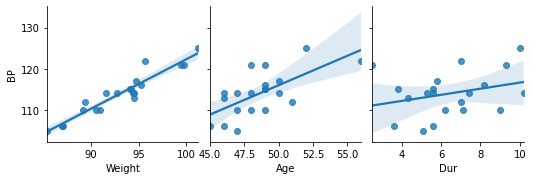

In [177]:
N = len(bloodpress_df)
bloodpress_df = bloodpress_df.astype(np.float32)

x_cols = ['Weight','Age','Dur']
sns.pairplot(bloodpress_df,x_vars=x_cols, y_vars='BP',kind="reg")
for col in x_cols:
    slope, intercept, R, p, se = sp.stats.linregress(bloodpress_df[col], bloodpress_df['BP'])
    bloodpress_df[f'{col}_pred'] = slope * bloodpress_df[col] + intercept
    bloodpress_df[f'{col}_residual'] = bloodpress_df['BP'] - bloodpress_df[f'{col}_pred']
    
    adj_R = 1-(1-R**2)*(N-1)/(N-1-1) 
    print(f'{col}: R-squared adj - {round(adj_R,2)}')

<Figure size 1440x720 with 0 Axes>

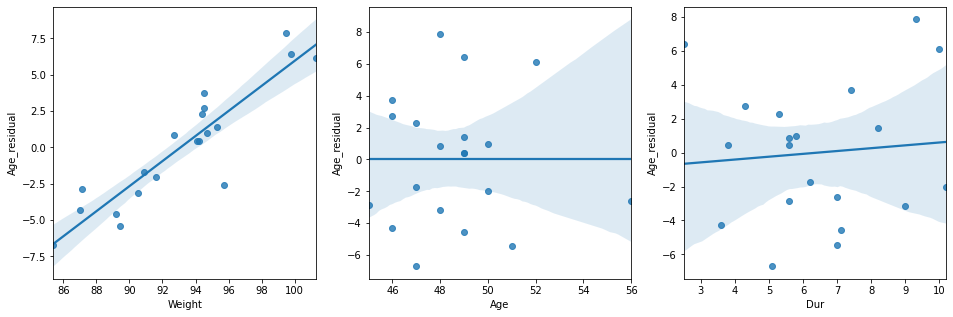

In [183]:
# y_cols = ['Weight_residual','Age_residual','Dur_residual']
plt.figure(figsize=(20,10))

fig, axs = plt.subplots(ncols=3,figsize=(16,5))
slope, intercept, R, p, se = sp.stats.linregress(bloodpress_df['Age'], bloodpress_df['BP'])
bloodpress_df['Age_pred'] = slope * bloodpress_df['Age'] + intercept
bloodpress_df['Age_residual'] = bloodpress_df['BP'] - bloodpress_df[f'Age_pred']
for ii,col in enumerate(x_cols):
    sns.regplot(x=col, y=f'Age_residual', data=bloodpress_df, ax=axs[ii],fit_reg=True);

Weight_Age_residual: R-squared adj: -0.08


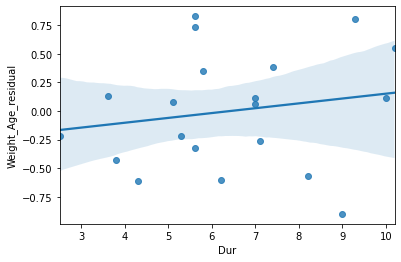

In [182]:
reg = LinearRegression(fit_intercept=True).fit(bloodpress_df[['Weight','Age']], bloodpress_df['BP'])
bloodpress_df['Weight_Age_predict'] = reg.coef_[0] * bloodpress_df['Weight'] + reg.coef_[1] * bloodpress_df['Age'] + reg.intercept_
bloodpress_df['Weight_Age_residual'] = bloodpress_df['BP'] - bloodpress_df['Weight_Age_predict']

# bloodpress_df[f'{col}_residual'] = bloodpress_df['BP'] - bloodpress_df[f'{col}_pred']
sns.regplot(x="Dur", y="Weight_Age_residual", data=bloodpress_df)
slope, intercept, R, p, se = sp.stats.linregress(bloodpress_df['Dur'], bloodpress_df["Weight_Age_residual"])
adj_R = 1-(1-R**2)*(N-1)/(N-2-1) 

print(f'Weight_Age_residual: R-squared adj: {round(adj_R,2)}')
